# Social Network Analysis @ UNIPI
## Solution of the First Midterm  
### 2/4/2019

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Es 1: Graph Modeling

Given the matrix $\mathcal{G}$

| &nbsp;  | &nbsp;  | &nbsp;  | &nbsp;  | &nbsp;  |
| --- | --- | --- | --- | --- |
| 0 | 0 | 1 | 1 | 0 |
| 0 | 1 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 | 0 |
| 0 | 0 | 0 | 1 | 1 |
| 1 | 0 | 1 | 0 | 0 |

- Draw $\mathcal{G}$;
- Synthetically characterize the graph $\mathcal{G}$ describes (directedness, number of nodes/edges, density, components, max/min/avg degrees\dots).


In [2]:
g = nx.DiGraph()

In [3]:
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(2, 2)
g.add_edge(3, 1)
g.add_edge(3, 2)
g.add_edge(3, 4)
g.add_edge(4, 4)
g.add_edge(4, 5)
g.add_edge(5, 1)
g.add_edge(5, 3)

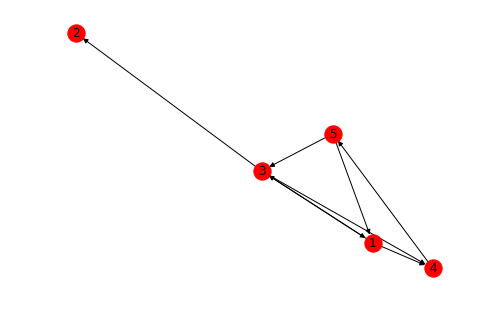

In [4]:
nx.draw(g, with_labels=True)
plt.show()

In [5]:
g.is_directed()

True

In [6]:
list(g.selfloop_edges())

[(4, 4), (2, 2)]

We remove self loop to avoid tempering network statistics

In [7]:
g.remove_edge(4, 4) 
g.remove_edge(2, 2)

In [8]:
g.number_of_edges(), g.number_of_nodes()

(8, 5)

In [9]:
nx.density(g) # considering self-loops, 0.4 without considering self-loops

0.4

In [10]:
nx.number_strongly_connected_components(g), nx.number_weakly_connected_components(g)

(2, 1)

In [11]:
degs = dict(g.degree())

In [12]:
max(degs.values()), min(degs.values()), np.mean(list(degs.values()))

(5, 1, 3.2)

In [13]:
in_degs = dict(g.in_degree())

In [14]:
max(in_degs.values()), min(in_degs.values()), np.mean(list(in_degs.values()))

(2, 1, 1.6)

In [15]:
out_degs = dict(g.out_degree())

In [16]:
max(out_degs.values()), min(out_degs.values()), np.mean(list(out_degs.values()))

(3, 0, 1.6)

## Exercise 2: Projections

Given the bipartite graph $\mathcal{g}$ compute:
- The adjacency matrixes of its projections (over the two node classes) and of the bipartite graph;
- The node having the lowest Closeness Centrality in both projections;
- The node having the highest Betweeness Centrality in both projections.

In [17]:
g = nx.Graph()
g.add_edge(1, "A")
g.add_edge(2, "A")
g.add_edge(2, "B")
g.add_edge(3, "A")
g.add_edge(3, "D")
g.add_edge(4, "C")
g.add_edge(4, "D")
g.add_edge(5, "D")

In [18]:
nx.is_bipartite(g)

True

In [19]:
nx.to_numpy_matrix(g)

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.]])

An alternative, more compact (although non canonical) representation of the adjacency matrix for bipartite graphs can be obtained by placing nodes of the first class on the rows and nodes of the second on the columns. 

### Projections over the two classes

In [20]:
from networkx.algorithms import bipartite

In [21]:
a = bipartite.weighted_projected_graph(g, [1, 2, 3, 4, 5])

In [22]:
nx.to_numpy_matrix(a)

matrix([[0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 1., 1.],
        [0., 0., 1., 0., 1.],
        [0., 0., 1., 1., 0.]])

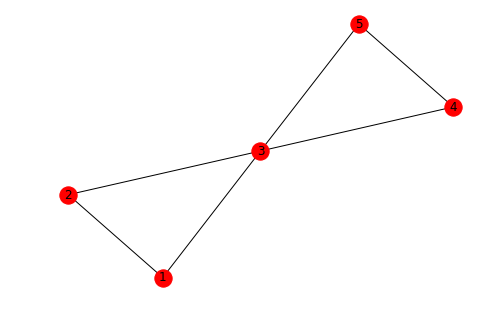

In [23]:
nx.draw(a, with_labels=True)
plt.show()

In [24]:
bt = nx.closeness_centrality(a)

for k, v in bt.items():
    bt[k] = 1/v # non normalized version

bt

{1: 1.5, 2: 1.5, 3: 1.0, 4: 1.5, 5: 1.5}

In [25]:
nx.betweenness_centrality(a, normalized=False)

{1: 0.0, 2: 0.0, 3: 4.0, 4: 0.0, 5: 0.0}

In [26]:
b = bipartite.weighted_projected_graph(g, ["A", "B", "C", "D"])

In [27]:
nx.to_numpy_matrix(b)

matrix([[0., 1., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 1., 0.]])

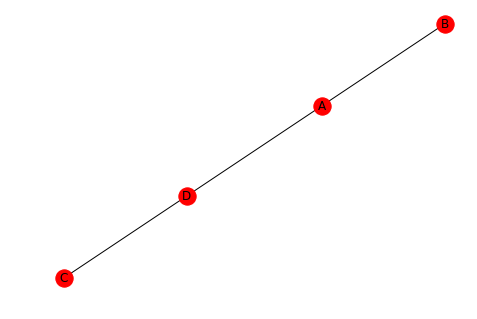

In [28]:
nx.draw(b, with_labels=True)
plt.show()

In [29]:
bt = nx.closeness_centrality(b)
for k, v in bt.items():
    bt[k] = 1/v
bt # non normalized version

{'A': 1.3333333333333333, 'B': 2.0, 'C': 2.0, 'D': 1.3333333333333333}

In [30]:
nx.betweenness_centrality(b, normalized=False)

{'A': 2.0, 'B': 0.0, 'C': 0.0, 'D': 2.0}

## Exercise 3: Synthetic graphs

Let $\mathcal{E}$ be an Erdos-Renyi graph having 3521 nodes and 16320 edges:
- What is the value of $p$ that allows to generate $\mathcal{E}$?
-  What will be the average degree of $\mathcal{E}$ nodes? and the graph density?
- Describe the regime of $\mathcal{E}$.

In [31]:
n = 3521
e = 16320

In [32]:
p =  (2*e)/(n*(n-1))
p # p is also the density

0.0026335493532312617

In [33]:
avg_deg = (2*e)/n
avg_deg

9.27009372337404

Supercritical regime

$p > \frac{1}{n}$ 

In [34]:
p < 1/n, p == 1/n, p > 1/n, p > np.log(n)/n

(False, False, True, True)

## Exercise 4: Paths

Given the *Franklin graph* $\mathcal{G}$:
- Compute its diameter;
- List all the shortest paths among the pairs [F,L], [B,E], [C,H], [B,L];
- Compute the edge betweenness of (G,L), (A,F) and (I,N);
- Is it possible to identify an Hamiltonian cycle on $\mathcal{G}$? If not specify the minimum set of edges to needed to build it.

In [35]:
g = nx.Graph()

In [36]:
g.add_edge("A", "B")
g.add_edge("A", "H")
g.add_edge("A", "F")
g.add_edge("B", "C")
g.add_edge("B", "I")
g.add_edge("C", "D")
g.add_edge("C", "L")
g.add_edge("D", "E")
g.add_edge("D", "M")
g.add_edge("E", "F")
g.add_edge("E", "N")
g.add_edge("F", "G")
g.add_edge("G", "H")
g.add_edge("G", "L")
g.add_edge("H", "M")
g.add_edge("I", "N")
g.add_edge("I", "L")
g.add_edge("M", "N")

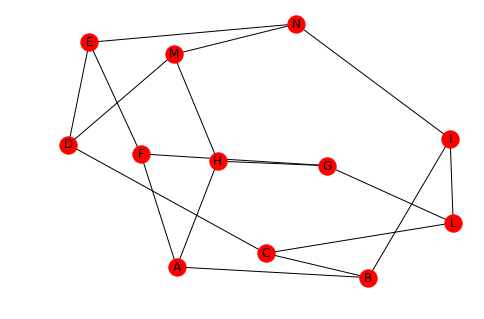

In [37]:
nx.draw(g, with_labels=True)
plt.show()

In [38]:
nx.diameter(g)

3

In [39]:
list(nx.all_shortest_paths(g, "F", "L"))

[['F', 'G', 'L']]

In [40]:
list(nx.all_shortest_paths(g, "B", "E"))

[['B', 'A', 'F', 'E'], ['B', 'C', 'D', 'E'], ['B', 'I', 'N', 'E']]

In [41]:
list(nx.all_shortest_paths(g, "C", "H"))

[['C', 'B', 'A', 'H'], ['C', 'D', 'M', 'H'], ['C', 'L', 'G', 'H']]

In [42]:
list(nx.all_shortest_paths(g, "B", "L"))

[['B', 'C', 'L'], ['B', 'I', 'L']]

In [43]:
ebc = nx.edge_betweenness_centrality(g, normalized=False)

In [44]:
ebc[('L', 'G')], ebc[('A', 'F')], ebc[('I', 'N')]

(8.666666666666666, 6.666666666666668, 8.666666666666664)

In [45]:
from networkx.algorithms.tournament import hamiltonian_path
s = nx.to_directed(g)
hamiltonian_path(s)  # g has a hamiltonian path 

['H', 'A', 'D', 'M', 'F', 'N', 'L', 'G', 'B', 'C', 'I', 'E']

In [46]:
s.has_edge('F', 'G')  # the path can be closed to identify a cycle

True

## Exercise 5: Indicators

Given *Franklin graph* $\mathcal{G}$ compute:
- Degree Centrality of all nodes;
- Closeness Centrality of A, G;
- Betweenness Centrality of I, E;
- Local Clustering Coefficient of F, L.


In [47]:
dict(g.degree())

{'A': 3,
 'B': 3,
 'H': 3,
 'F': 3,
 'C': 3,
 'I': 3,
 'D': 3,
 'L': 3,
 'E': 3,
 'M': 3,
 'N': 3,
 'G': 3}

In [48]:
bt = nx.closeness_centrality(g, 'A')

1/bt # non normalized version

2.0

In [49]:
bt = nx.closeness_centrality(g, 'G')
    
1/bt # non normalized version

2.0

In [50]:
btc = nx.betweenness_centrality(g, normalized=False)

In [51]:
btc['I'], btc['E']

(5.5, 5.499999999999999)

In [52]:
cls = nx.clustering(g)

In [53]:
cls['F'], cls['L']

(0, 0)

## Exercise 6: Graph Construction

Given **10** nodes and, at most, **20** edges build a graph such that all the following conditions hold:

- The graph is composed by a single components;
- There exists a path of length 5 between nodes 1 and 2;
- Node 2 has a clustering coefficient of $\frac{1}{3}$;
- The shortest path among 5 and 1 is equal to 2;
- Node 6 has the highest Degree Centrality;
- Node 7 has the lowest Closeness Centrality;

In [54]:
g = nx.Graph()

In [55]:
g.add_edge('1', '3')
g.add_edge('3', '2')
g.add_edge('3', '4')
g.add_edge('4', '5')
g.add_edge('5', '6')
g.add_edge('6', '2')
g.add_edge('2', '4')
g.add_edge('1', '7')
g.add_edge('6', '8')
g.add_edge('6', '9')
g.add_edge('6', '10')
g.add_edge('7', '9')
g.add_edge('7', '8')
g.add_edge('7', '10')
g.add_edge('7', '5')

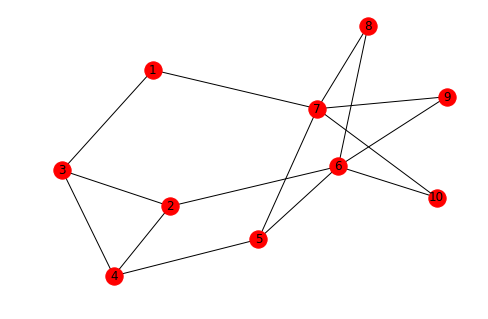

In [56]:
nx.draw(g, with_labels=True)
plt.show()

In [57]:
nx.shortest_path_length(g, '1', '2')

2

In [58]:
pt = list(nx.all_simple_paths(g, '1', '2'))
[True for x in pt if len(x)==5]

[True, True, True, True, True]

In [59]:
nx.clustering(g)['2']

0.3333333333333333

In [60]:
bt = nx.closeness_centrality(g)
for k, v in bt.items():
    bt[k] = 1/v # 

sorted(bt.items(), key=lambda x: x[1])

[('6', 1.5555555555555554),
 ('7', 1.5555555555555554),
 ('5', 1.6666666666666667),
 ('2', 1.7777777777777777),
 ('1', 1.8888888888888888),
 ('3', 2.0),
 ('4', 2.0),
 ('8', 2.0),
 ('9', 2.0),
 ('10', 2.0)]

In [61]:
sorted(dict(g.degree()).items(), key=lambda x: -x[1])

[('6', 5),
 ('7', 5),
 ('3', 3),
 ('2', 3),
 ('4', 3),
 ('5', 3),
 ('1', 2),
 ('8', 2),
 ('9', 2),
 ('10', 2)]